In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn-colorblind')

- Vedo se trovo qualche caso particolare di andamenti di citazioni, come nelle fig. 1 e 2 del paper.  
- Nei dati nuovi, ho due classi di ranking: CORE e GRIN.  
Per CORE abbiamo i rating di diversi anni: 20xx, 20xx ecc. Andrò quindi ad osservare le citazioni negli anni per i quali ho il rating.
Per quanto riguarda GRIN, abbiamo soltanto la classe e il rating aggiornati al 24/10/2021 (quindi un solo valore per ogni conferenza): di conseguenza guarderò l'andamento delle citazioni di tutti gli anni (a differenza di CORE)

In [2]:
df_MAG = pd.read_csv('out_MAG_citations_and_locations_analysis_ready.csv', index_col='ConferenceSeriesNormalizedName')
df_MAG.drop(columns='Unnamed: 0', inplace=True)
df_MAG

,CitationCount,ConferenceLocation,ConferenceNormalizedName,Doi,Year
ConferenceSeriesNormalizedName,,,,,
disc,12,"Austin, Texas, United States",disc 2014,10.1007/978-3-662-45174-8_28,2014
esa,10,"Wrocław, Lower Silesian Voivodeship, Poland",esa 2014,10.1007/978-3-662-44777-2_60,2014
enter,20,"Innsbruck, Tyrol, Austria",enter 2013,10.1007/978-3-319-03973-2_13,2013
dexa,0,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",dexa 2002,10.1007/3-540-46146-9_77,2002
icaisc,19,"Zakopane, Lesser Poland Voivodeship, Poland",icaisc 2006,10.1007/11785231_94,2006
...,...,...,...,...,...
sapere,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,10.1007/978-3-642-31674-6_9,2011
sapere,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,10.1007/978-3-642-31674-6_20,2011
sapere,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,10.1007/978-3-642-31674-6_25,2011


In [3]:
tot_cit_year = df_MAG.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.sum().sort_values(ascending=False)
tot_articles_year = df_MAG.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.count()

# creo un dataframe dove per ogni conferenza seguo l'evoluzione annuale solo delle citazioni medie 
lst_dataframes = []
keys = df_MAG.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count().keys()

for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in tot_cit_year[conference].items():
        single_conference[str(k)] = v/tot_articles_year[conference][k] #calcolo citazioni medie per ogni anno
        n_editions +=1
    if n_editions>1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))
# unisco tutti i dataframe creati
avg_cit_per_year = pd.concat(lst_dataframes)
avg_cit_per_year = avg_cit_per_year.reindex(sorted(avg_cit_per_year.columns), axis=1)

avg_cit_per_year.head(10)

,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.0,NaN
3dimpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3dtv-con,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.034483,5.785714,2.666667,2.870968,NaN,NaN,NaN,NaN,NaN
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.703125,12.236364,7.446429,10.034483,8.104478,NaN,NaN,NaN,NaN,NaN
3dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.071429,11.481132,11.189189,NaN,35.260274,21.209877,7.461538,NaN,NaN,NaN


In [4]:
# stessa cosa ma per le citazioni totali
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in tot_cit_year[conference].items():
        single_conference[str(k)] = v 
        n_editions += 1
    if n_editions >1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

tot_cit_per_year = pd.concat(lst_dataframes)
tot_cit_per_year = tot_cit_per_year.reindex(sorted(tot_cit_per_year.columns), axis=1)
tot_cit_per_year.head(10)

,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN
3dimpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3dtv-con,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.0,162.0,64.0,89.0,NaN,NaN,NaN,NaN,NaN
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,557.0,673.0,417.0,582.0,543.0,NaN,NaN,NaN,NaN,NaN
3dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1852.0,1217.0,828.0,NaN,2574.0,1718.0,582.0,NaN,NaN,NaN


### Andamento delle citazioni totali per il ranking CORE  
Abbiamo il ranking per gli anni 2008,2013,2014,2017,2018,2020,2021  
Estraggo quindi le citazioni di questi anni e le raccolgo in un dataframe.  
Dopodichè analizzerò le conferenze per le quali la classe rimane invariata nei vari anni disponibili

In [5]:
ranking_core = pd.read_csv('out_conference_series_with_core_rank.csv', index_col='ConferenceSeriesNormalizedName')
ranking_core.drop(columns='Unnamed: 0', inplace=True)
# mantengo le righe per le quali ho lo stesso ranking per ogni anno
ranking_core.dropna(how='any', inplace=True) 
ranking_core = ranking_core[ranking_core.eq(ranking_core.iloc[:, 0], axis=0).all(1)]

ranking_core

,CORE_2008_Rank,CORE_2013_Rank,CORE_2014_Rank,CORE_2017_Rank,CORE_2018_Rank,CORE_2020_Rank,CORE_2021_Rank,ERA_2010_Rank
ConferenceSeriesNormalizedName,,,,,,,,
disc,A,A,A,A,A,A,A,A
esa,A,A,A,A,A,A,A,A
safecomp,B,B,B,B,B,B,B,B
kes,B,B,B,B,B,B,B,B
seal,B,B,B,B,B,B,B,B
...,...,...,...,...,...,...,...,...
lpar,A,A,A,A,A,A,A,A
seta,B,B,B,B,B,B,B,B
sirocco,B,B,B,B,B,B,B,B


In [6]:
# join cit totali e ranking

tot_cit_core = ranking_core.join(tot_cit_per_year)
# conservo solo le citazioni degli anni per i quali ho il ranking CORE
columns_to_drop = list(range(1951,2008)) + [2009,2010,2011,2012,2015,2016,2019,2022]
columns_to_drop = [str(x) for x in columns_to_drop] + ['ERA_2010_Rank']
tot_cit_core.drop(columns=columns_to_drop, inplace=True)
# elimino le conferenze per le quali non ho citazioni in quegli anni
tot_cit_core.dropna(subset=['2008','2013','2014','2017','2018','2020','2021'], inplace=True)

tot_cit_core

,CORE_2008_Rank,CORE_2013_Rank,CORE_2014_Rank,CORE_2017_Rank,CORE_2018_Rank,CORE_2020_Rank,CORE_2021_Rank,2008,2013,2014,2017,2018,2020,2021
ConferenceSeriesNormalizedName,,,,,,,,,,,,,,
ideal,C,C,C,C,C,C,C,436.0,488.0,253.0,133.0,252.0,8.0,0.0
iccsa,C,C,C,C,C,C,C,1761.0,1460.0,1480.0,946.0,621.0,94.0,0.0
ecoop,A,A,A,A,A,A,A,1426.0,672.0,537.0,185.0,144.0,18.0,0.0
parco,C,C,C,C,C,C,C,1116.0,1218.0,958.0,610.0,341.0,82.0,8.0
opodis,B,B,B,B,B,B,B,639.0,216.0,274.0,97.0,123.0,17.0,2.0
ipco,A,A,A,A,A,A,A,581.0,0.0,176.0,287.0,4.0,87.0,6.0
ace,B,B,B,B,B,B,B,1180.0,551.0,178.0,197.0,85.0,33.0,1.0
vtc,B,B,B,B,B,B,B,12463.0,7914.0,5230.0,4181.0,2813.0,0.0,0.0
gd,A,A,A,A,A,A,A,0.0,317.0,248.0,108.0,134.0,29.0,5.0


#### Ora da qui prendo i casi più interessanti di variazioni di citazioni.
#### Le colonne dei ranking sono superflue (sono tutte uguali) quindi ne lascio soltanto una

In [7]:
tot_cit_core.drop(columns=['CORE_2013_Rank','CORE_2014_Rank', 'CORE_2017_Rank','CORE_2018_Rank','CORE_2020_Rank','CORE_2021_Rank'], inplace=True)
tot_cit_core.rename(columns={'CORE_2008_Rank' : 'Rank'}, inplace=True)
tot_cit_core.sort_values(by=['Rank'], inplace=True)
tot_cit_core

,Rank,2008,2013,2014,2017,2018,2020,2021
ConferenceSeriesNormalizedName,,,,,,,,
middleware,A,1849.0,293.0,537.0,10.0,213.0,22.0,0.0
icnp,A,1309.0,1764.0,1133.0,475.0,278.0,22.0,0.0
rtas,A,1373.0,886.0,763.0,366.0,306.0,44.0,0.0
bpm,A,3018.0,1792.0,993.0,720.0,556.0,98.0,0.0
caise,A,0.0,919.0,978.0,569.0,405.0,100.0,0.0
issre,A,718.0,0.0,1231.0,385.0,385.0,32.0,0.0
sc,A,30.0,34.0,0.0,0.0,0.0,0.0,0.0
iccs,A,3830.0,3217.0,3412.0,1264.0,989.0,248.0,0.0
cgo,A,956.0,817.0,0.0,391.0,0.0,73.0,13.0


In [8]:
# dizionario che facilita la creazione del grafico
dict_tot_cit_core = {}
for row,col in tot_cit_core.iterrows():
    x = {}
    for k,v in col.items():
        if k=='Rank':
            continue
        if not math.isnan(v):
            x[k] = v
    dict_tot_cit_core[row] = x

In [9]:
""" Funzione che crea e stampa i grafici degli andamenti delle citazioni.
Prende in input il dizionario con i dati da rappresentare, il nome della conference series e la directory
dove salvare un file png con il grafico"""

def draw_plot(dictionary,conf1,conf2,conf3,directory):
    fig,ax = plt.subplots(figsize=(8,6))
    sns.lineplot(x=list(dictionary[conf1].keys()), y=list(dictionary[conf1].values()),label=conf1)
    sns.lineplot(x=list(dictionary[conf2].keys()), y=list(dictionary[conf2].values()),label=conf2)
    sns.lineplot(x=list(dictionary[conf3].keys()), y=list(dictionary[conf3].values()),label=conf3)
    sns.scatterplot(x=list(dictionary[conf1].keys()), y=list(dictionary[conf1].values()))
    sns.scatterplot(x=list(dictionary[conf2].keys()), y=list(dictionary[conf2].values()))
    sns.scatterplot(x=list(dictionary[conf3].keys()), y=list(dictionary[conf3].values()))
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.savefig(directory)

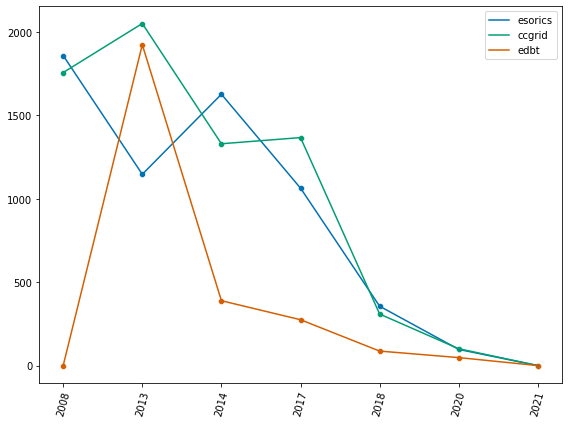

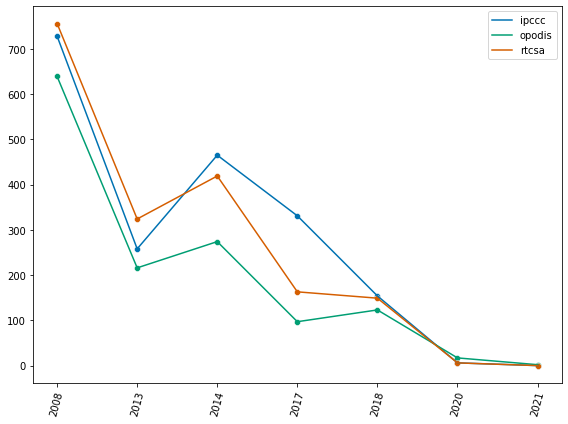

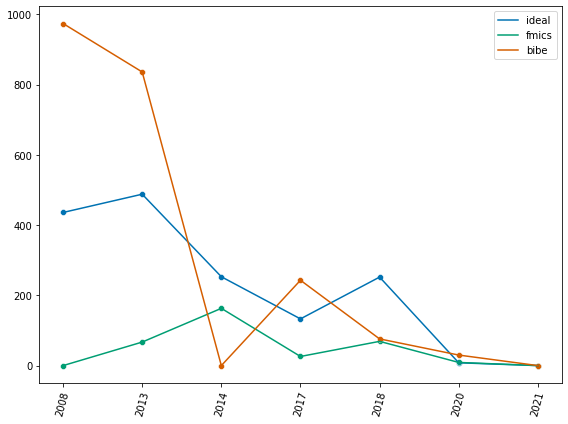

In [10]:
# classe A
draw_plot(dict_tot_cit_core, 'esorics','ccgrid','edbt','charts/conf_tot_core_a.png')

# classe B
draw_plot(dict_tot_cit_core, 'ipccc','opodis','rtcsa','charts/conf_tot_core_b.png')

# classe C
draw_plot(dict_tot_cit_core, 'ideal','fmics','bibe','charts/conf_tot_core_c.png')

#### Commenti sull'andamento delle citazioni totali  

1. In generale, notiamo una diminuzione delle citazioni negli anni più recenti.  
2. Ci sono due fasce temporali in cui il crollo è evidente in tutte e tre le classi:
    - 2013-2014  
    - 2017-2018
    - 2008-2013 (solo per la classe B)
    
Quest'ultima non deve stupirci, in quanto sono passati 5 anni da un estremo all'altro della fascia. Devono colpirci invece le prime due, per il motivo opposto: è passato un solo anno da un estremo all'altro.
  

### Ranking CORE, citazioni medie  
Replico quello che ho appena fatto, sostituendo le citazioni totali con quelle medie

In [11]:
avg_cit_core = ranking_core.join(avg_cit_per_year)
# conservo solo le citazioni degli anni per i quali ho il ranking CORE
columns_to_drop = list(range(1951,2008)) + [2009,2010,2011,2012,2015,2016,2019,2022]
columns_to_drop = [str(x) for x in columns_to_drop] + ['ERA_2010_Rank']
avg_cit_core.drop(columns=columns_to_drop, inplace=True)
# elimino le conferenze per le quali non ho citazioni in quegli anni
avg_cit_core.dropna(subset=['2008','2013','2014','2017','2018','2020','2021'], inplace=True)

avg_cit_core.drop(columns=['CORE_2013_Rank','CORE_2014_Rank', 'CORE_2017_Rank','CORE_2018_Rank','CORE_2020_Rank','CORE_2021_Rank'], inplace=True)
avg_cit_core.rename(columns={'CORE_2008_Rank' : 'Rank'}, inplace=True)
avg_cit_core.sort_values(by=['Rank'], inplace=True)

# dizionario che facilita la creazione del grafico
dict_avg_cit_core = {}
for row,col in avg_cit_core.iterrows():
    x = {}
    for k,v in col.items():
        if k=='Rank':
            continue
        if not math.isnan(v):
            x[k] = v
    dict_avg_cit_core[row] = x
    
avg_cit_core

,Rank,2008,2013,2014,2017,2018,2020,2021
ConferenceSeriesNormalizedName,,,,,,,,
middleware,A,16.078261,4.966102,7.671429,0.158730,3.944444,0.314286,0.000000
icnp,A,38.500000,16.800000,13.174419,6.985294,4.964286,0.349206,0.000000
rtas,A,34.325000,30.551724,27.250000,9.384615,8.742857,1.517241,0.000000
bpm,A,23.395349,14.451613,6.755102,6.728972,3.915493,1.020833,0.000000
caise,A,0.000000,6.611511,7.353383,7.586667,3.970588,1.149425,0.000000
issre,A,10.405797,0.000000,8.489655,3.701923,4.325843,0.278261,0.000000
sc,A,0.588235,1.062500,0.000000,0.000000,0.000000,0.000000,0.000000
iccs,A,5.993740,8.718157,5.257319,4.419580,1.398868,0.664879,0.000000
cgo,A,39.833333,21.500000,0.000000,14.481481,0.000000,2.920000,0.371429


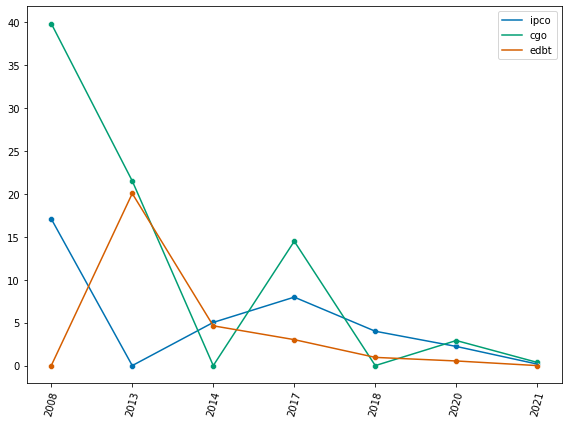

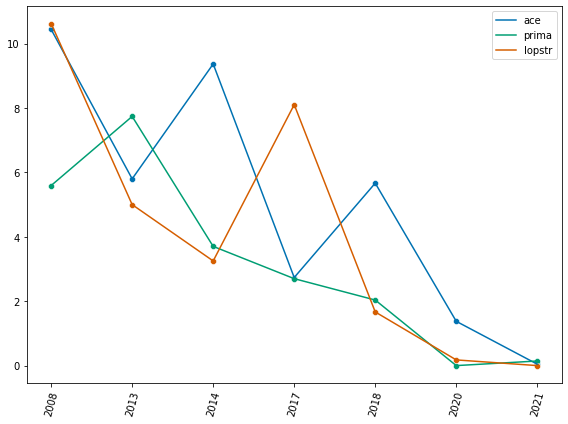

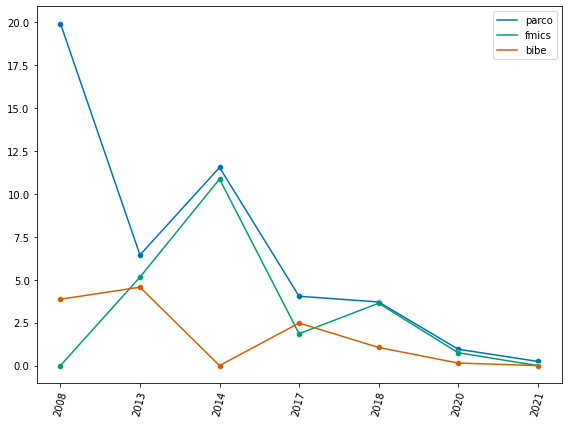

In [12]:
# classe A
draw_plot(dict_avg_cit_core, 'ipco','cgo','edbt','charts/conf_avg_core_a.png')

# classe B
draw_plot(dict_avg_cit_core, 'ace','prima','lopstr','charts/conf_avg_core_b.png')

# classe C
draw_plot(dict_avg_cit_core, 'parco','fmics','bibe','charts/conf_avg_core_c.png')

#### Commenti sull'andamento delle citazioni medie  
In questa analisi notiamo delle variazioni altalenanti, quindi abbassamenti e rialzi che si alternano per più anni: la classe in cui è più evidente questo scenario è sicuramente la classe B, dove questi cambiamenti sono anche drastici. Ad esempio la conferenza ace, classe B, dimezza e raddoppia per più volte il numero di citazioni medie.
Altri fatti evidenti sono le diminuzioni in anni non troppo recenti.  
Esempi:
- classe A, conferenza **ipco**
- classe C, conferenza **bibe**

### Andamento delle citazioni totali per il ranking GRIN  
Non avendo il rating per vari anni come per CORE, qui mi limiterò semplicemente a mostrare per ogni classe (1,2,3) dei casi particolari di andamenti di citazioni negli anni

In [13]:
ranking_grin = pd.read_csv('out_conference_series_with_grin_rank.csv', index_col='ConferenceSeriesNormalizedName')
ranking_grin.drop(['Unnamed: 0','GrinRating'], axis=1, inplace=True)
ranking_grin.dropna(subset=['GrinClass'], inplace=True)

#creo il dataset delle citazioni totali che servirà per l'analisi
tot_cit_grin = ranking_grin.join(tot_cit_per_year)
tot_cit_grin

,GrinClass,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ConferenceSeriesNormalizedName,,,,,,,,,,,,,,,,,,,,,
disc,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,616.0,585.0,548.0,NaN,727.0,351.0,136.0,NaN,NaN,NaN
esa,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,880.0,722.0,694.0,433.0,290.0,224.0,119.0,NaN,0.0,NaN
dexa,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,589.0,349.0,0.0,296.0,285.0,215.0,120.0,26.0,NaN,NaN
interact,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3928.0,1396.0,2475.0,1107.0,1195.0,448.0,1445.0,403.0,0.0,NaN
fct,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,NaN,99.0,NaN,102.0,NaN,62.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jelia,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
dbsec,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
lpar,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [14]:
# dizionario che facilita la creazione del grafico dell'andamento delle citazioni totali
dict_tot_cit_grin = {}
for row,col in tot_cit_grin.iterrows():
    x = {}
    for k,v in col.items():
        if k=='GrinClass':
            continue
        x[k] = v
    dict_tot_cit_grin[row] = x

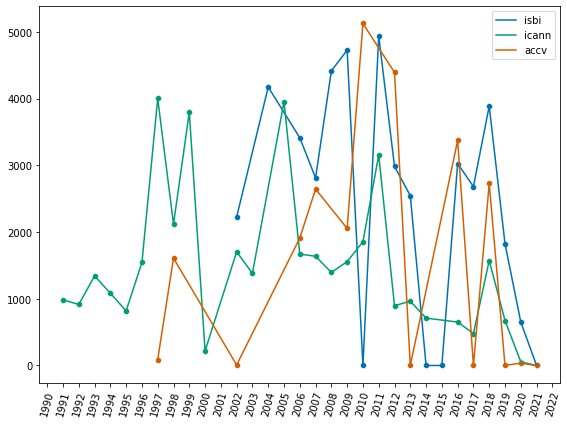

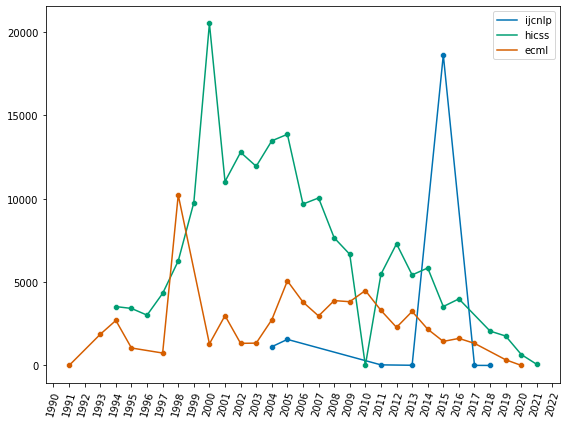

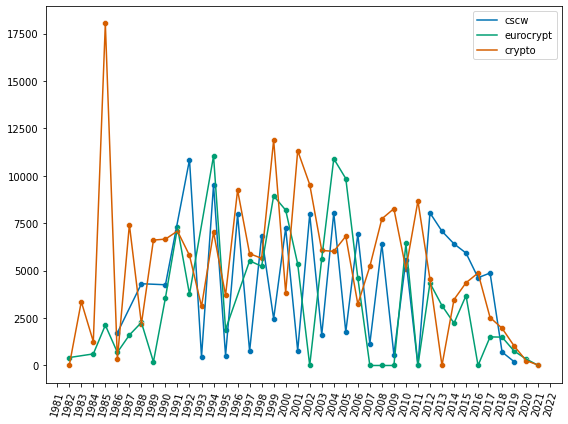

In [15]:
# classe 3
draw_plot(dict_tot_cit_grin, 'isbi','icann','accv','charts/conf_tot_grin_3.png')

# classe 2
draw_plot(dict_tot_cit_grin, 'ijcnlp','hicss','ecml','charts/conf_tot_grin_2.png')

# classe 1
draw_plot(dict_tot_cit_grin, 'cscw','eurocrypt','crypto','charts/conf_tot_grin_1.png')

#### Commenti sull'andamento delle citazioni totali  

- In questi ultimi tre grafici balzano all'occhio le continue fluttuazioni delle citazioni,verso l'alto e verso il basso. Il caso più evidente è sicuramente nella classe 1, il cui grafico è "disordinato" proprio a causa delle linee che fanno spesso su e giù.  
- Nel grafico della classe 2 invece la particolarità sta nell'andamento costante delle citazioni, tranne che per un solo anno, dove aumentano a dismisura, per poi tornare al loro andamento costante

### Andamento delle citazioni medie per il ranking GRIN  


In [16]:
# effettuo la stessa analisi per le citazioni medie
avg_cit_grin = ranking_grin.join(avg_cit_per_year)
avg_cit_grin.sort_values('GrinClass', inplace=True)
avg_cit_grin

# dizionario che facilita la creazione del grafico dell'andamento delle citazioni medie
dict_avg_cit_grin = {}
for row,col in avg_cit_grin.iterrows():
    x = {}
    for k,v in col.items():
        if k=='GrinClass':
            continue
        x[k] = v
    dict_avg_cit_grin[row] = x

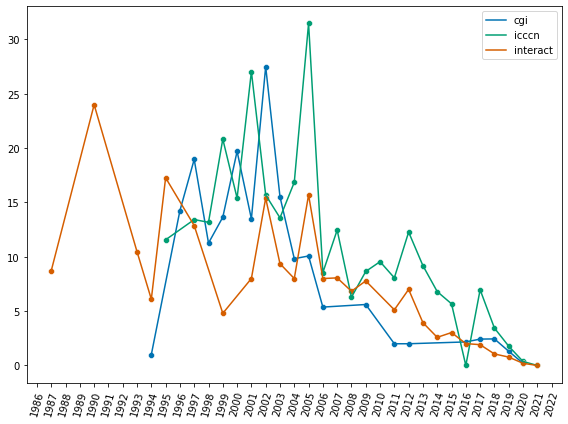

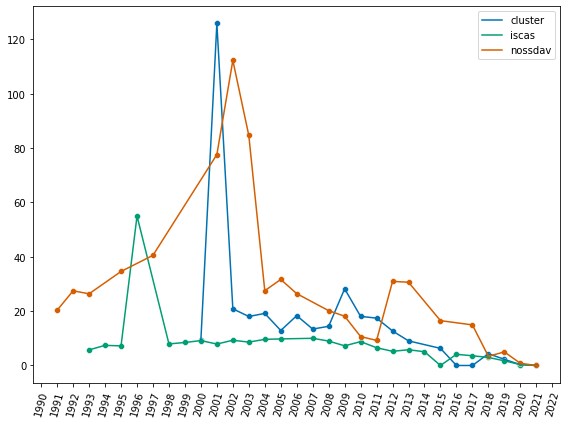

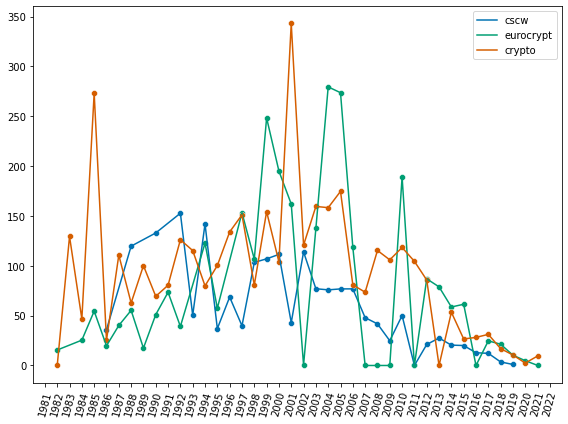

In [17]:
#classe 3
draw_plot(dict_avg_cit_grin, 'cgi','icccn','interact','charts/conf_avg_grin_3.png')

# classe 2
draw_plot(dict_avg_cit_grin, 'cluster','iscas','nossdav','charts/conf_avg_grin_2.png')

# classe 1
draw_plot(dict_avg_cit_grin, 'cscw','eurocrypt','crypto','charts/conf_tot_grin_1.png')

#### Commento sull'andamento delle citazioni medie

- Per le classi 2 e 3 non ho usato le stesse conferenze che ho analizzato nella sezione delle citazioni totali, in quanto non c'era nessun dettaglio interessante da commentare.  
- Nella classe 3 ora notiamo, per tutte e tre le conferenze, diversi picchi, fino ai primissimi anni 2000, per poi osservare una discesa più o meno costante, fino ad arrivare all'azzeramento totale degli ultimissimi anni.  
- Per la classe 2 invece abbiamo dei singoli picchi per ogni conferenza, successivamente delle diminuzioni continue fino agli anni più recenti (esclusa qualche piccolissima eccezione).  
- Il grafico della classe 1 invece conserva le conferenze visionate nelle citazioni totali; inoltre si nota una coerenza col grafico delle cit. totali, e quindi delle fluttuazioni continue, con valori che vanno quasi a quadruplicarsi.


## Confronto tra arrivi di turisti e citazioni  medie
In questa sezione cercherò di replicare ciò che è stato fatto per la fig.3 del paper, che mostra l'andamento delle citazioni medie di una conferenza negli anni, comparato all'indice Size Wikipedia Page (SWP) di un determinato luogo. In questo caso però sostituirò il SWP con l'arrivo di turisti (TA) in uno Stato.   
NB. I TA attualmente in possesso vanno dal 1995 al 2020, a differenza di quelli del paper, che si riferiscono solo all'anno 2018

In [18]:
# creo due dataframe che mi facilitano la costruzione dei grafici.
# Il primo contiene le conferenze, l'anno in cui si sono tenute e il relativo Stato, il secondo gli indici turistici
df_MAG['Country'] = df_MAG['ConferenceLocation'].str.split(',').str[-1].str.lstrip()

conf_country_year = df_MAG.loc[:, ['Year','Country']]
conf_country_year = conf_country_year.reset_index().drop_duplicates().set_index('ConferenceSeriesNormalizedName')
conf_country_year.sort_index(inplace=True)
conf_country_year = conf_country_year[(conf_country_year['Year'] >= 1995) & (conf_country_year['Year'] <= 2020)]
touristic_indexes_countries = pd.read_csv('all_indexes_by_country.csv')
touristic_indexes_countries.drop(columns=['ConferenceLocation'],inplace=True)
touristic_indexes_countries.drop_duplicates(inplace=True)


""" Dizionario che contiene l'arrivo di turisti nello Stato (TA) dove si è tenuta la conferenza in quel
determinato anno. Nel dataframe gli arrivi sono espressi in migliaia, qui invece in decine di milioni,
per far sì che sull'asse y i valori siano più simili a quelli delle citazioni medie 
(le cit. medie difficilmente sono più di 20, gli arrivi espressi in migliaia invece avevano valori molto alti)"""

dict_TA_conf_year = {}
for row,col in conf_country_year.iterrows():
    if row not in dict_TA_conf_year:
        x = {year : np.nan for year in [str(x) for x in list(range(1995,2021))]}
        dict_TA_conf_year[row] = x
        x[str(col['Year'])] = (touristic_indexes_countries[str(col['Year'])][touristic_indexes_countries['Country'] == col['Country']].values[0])/10000
    else:
        dict_TA_conf_year[row][str(col['Year'])] = (touristic_indexes_countries[str(col['Year'])][touristic_indexes_countries['Country'] == col['Country']].values[0])/10000

dict_TA_conf_year

{'16th-ibcast-2019': {'1995': nan,
  '1996': nan,
  '1997': nan,
  '1998': nan,
  '1999': nan,
  '2000': nan,
  '2001': nan,
  '2002': nan,
  '2003': nan,
  '2004': nan,
  '2005': nan,
  '2006': nan,
  '2007': nan,
  '2008': nan,
  '2009': nan,
  '2010': nan,
  '2011': nan,
  '2012': nan,
  '2013': nan,
  '2014': nan,
  '2015': nan,
  '2016': nan,
  '2017': nan,
  '2018': nan,
  '2019': nan,
  '2020': nan},
 '3dgis': {'1995': nan,
  '1996': nan,
  '1997': nan,
  '1998': nan,
  '1999': nan,
  '2000': nan,
  '2001': nan,
  '2002': nan,
  '2003': nan,
  '2004': nan,
  '2005': nan,
  '2006': 2.5298,
  '2007': nan,
  '2008': nan,
  '2009': nan,
  '2010': nan,
  '2011': nan,
  '2012': nan,
  '2013': nan,
  '2014': nan,
  '2015': nan,
  '2016': nan,
  '2017': nan,
  '2018': nan,
  '2019': nan,
  '2020': nan},
 '3dic': {'1995': nan,
  '1996': nan,
  '1997': nan,
  '1998': nan,
  '1999': nan,
  '2000': nan,
  '2001': nan,
  '2002': nan,
  '2003': nan,
  '2004': nan,
  '2005': nan,
  '2006': nan

In [19]:
# Creo un dictionary dove per ogni conferenza mi salvo anno e citazioni medie, dal 1995 al 2020

dict_avg_cit_conference = {}
for row,col in avg_cit_per_year.iloc[:,44:70].iterrows():
    x = {}
    for k,v in col.items():
        x[k] = v
    dict_avg_cit_conference[row] = x

Qui di seguito c'è il codice relativo ai grafici per riprodurre la fig.3 del paper.  
Ho provato ad inserirvi diverse decine di conferenze con i rispettivi TA: purtroppo non ho avuto risultati soddisfacenti; la linea delle citazioni ha un andamento molto diverso da quella dei TA, a volte persino opposto (ad un brusco calo delle citazioni corrisponde un netto aumento dei TA).

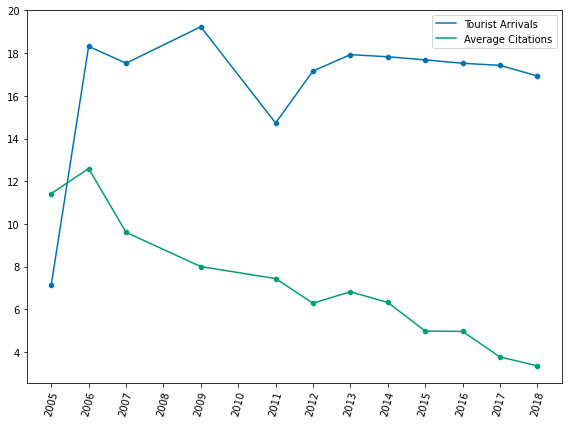

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_TA_conf_year['asilomar'].keys()), y=list(dict_TA_conf_year['asilomar'].values()),label='Tourist Arrivals')
sns.lineplot(x=list(dict_avg_cit_conference['asilomar'].keys()), y=list(dict_avg_cit_conference['asilomar'].values()),label='Average Citations')
sns.scatterplot(x=list(dict_TA_conf_year['asilomar'].keys()), y=list(dict_TA_conf_year['asilomar'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['asilomar'].keys()), y=list(dict_avg_cit_conference['asilomar'].values()))
plt.xticks(rotation=75)
plt.tight_layout()
#plt.savefig('charts/TA_avg_cit.png')


## Confronto tra citazioni medie  e altri indici turistici   
Verranno utilizzati tutti gli indici estratti dal report del World Economic Forum, per riprodurre la fig, 4 del paper.

In [21]:
# creo un dataframe con le citazioni medie per ogni stato, ed i relativi indici turistici
country_tot_cit = df_MAG.groupby(['Country']).CitationCount.sum().sort_values(ascending=False)
country_tot_articles = df_MAG.groupby(['Country']).CitationCount.count().sort_values(ascending=False)
country_avg_cit = {key:(int(val)/int(country_tot_articles[key])) for key,val in country_tot_cit.items()}
dict_cit_country_indexes = {k:[v,country_avg_cit[k]] for k,v in country_tot_cit.items()} 
df_country_avg_cit = pd.DataFrame(data=dict_cit_country_indexes.values(), index=dict_cit_country_indexes.keys(), columns=['TotCit', 'AvgCit'])

cit_country_indexes = df_country_avg_cit.join(touristic_indexes_countries.set_index('Country'))
# elimino le colonne che non servono
cit_country_indexes.drop(columns=[str(x) for x in list(range(1995,2021))], inplace=True)
cit_country_indexes

,TotCit,AvgCit,TTCI,EE,TTPEC,INF,NCR,BE,SS,HH,...,ICTR,PTT,IO,PC,ES,ATI,GPI,TSI,NR,CRBT
United States,15572679,15.833343,5.3,5.8,4.6,5.8,4.9,5.8,5.6,5.8,...,6.0,5.5,4.0,4.7,4.1,5.9,4.9,6.6,5.0,4.7
Canada,1783951,12.482078,5.1,5.6,4.6,5.5,4.4,5.2,6.1,5.7,...,5.8,5.1,3.6,4.9,4.9,6.6,3.9,6.1,4.8,4.0
China,1710750,4.760427,4.9,5.2,4.3,3.9,6.1,4.7,5.6,5.6,...,5.0,4.8,3.1,5.7,3.8,4.3,3.9,3.5,5.1,7.0
Germany,1252560,9.665262,5.4,6.0,4.8,5.5,5.3,5.4,5.8,7.0,...,6.0,5.0,4.3,4.6,5.3,4.9,5.7,5.9,4.1,6.5
Italy,1180660,9.781206,5.1,5.2,4.4,5.0,5.7,4.0,5.5,6.3,...,5.5,4.8,4.1,4.4,4.3,4.4,4.7,6.0,4.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Kitts and Nevis,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tanzania,0,0.000000,3.4,3.7,4.5,2.5,3.0,4.0,5.2,3.0,...,2.9,4.9,3.3,5.5,4.4,2.2,2.8,2.4,4.7,1.3
Rwanda,0,0.000000,3.2,4.3,4.3,2.6,1.9,4.9,5.9,2.8,...,3.4,4.1,3.2,5.3,4.5,1.9,3.4,2.3,2.6,1.2
Botswana,0,0.000000,3.5,4.4,4.4,2.8,2.3,4.9,5.3,3.3,...,4.1,4.8,2.3,6.0,4.3,2.1,2.8,3.6,3.4,1.2


In [22]:
_ = cit_country_indexes.copy()
_.rename({'TTCI':'metric'},axis=1,inplace=True)
_.loc[:,'KIND']='TTCI'

for x in cit_country_indexes.columns[2:]:
    __ = cit_country_indexes.copy()
    __.rename({str(x):'metric'},axis=1,inplace=True)
    __.loc[:,'KIND']= str(x)
    _ = _.append(__)
    
    
_['metric'] = _['metric'].round(decimals=1)
_.sort_values(['KIND'],inplace=True)

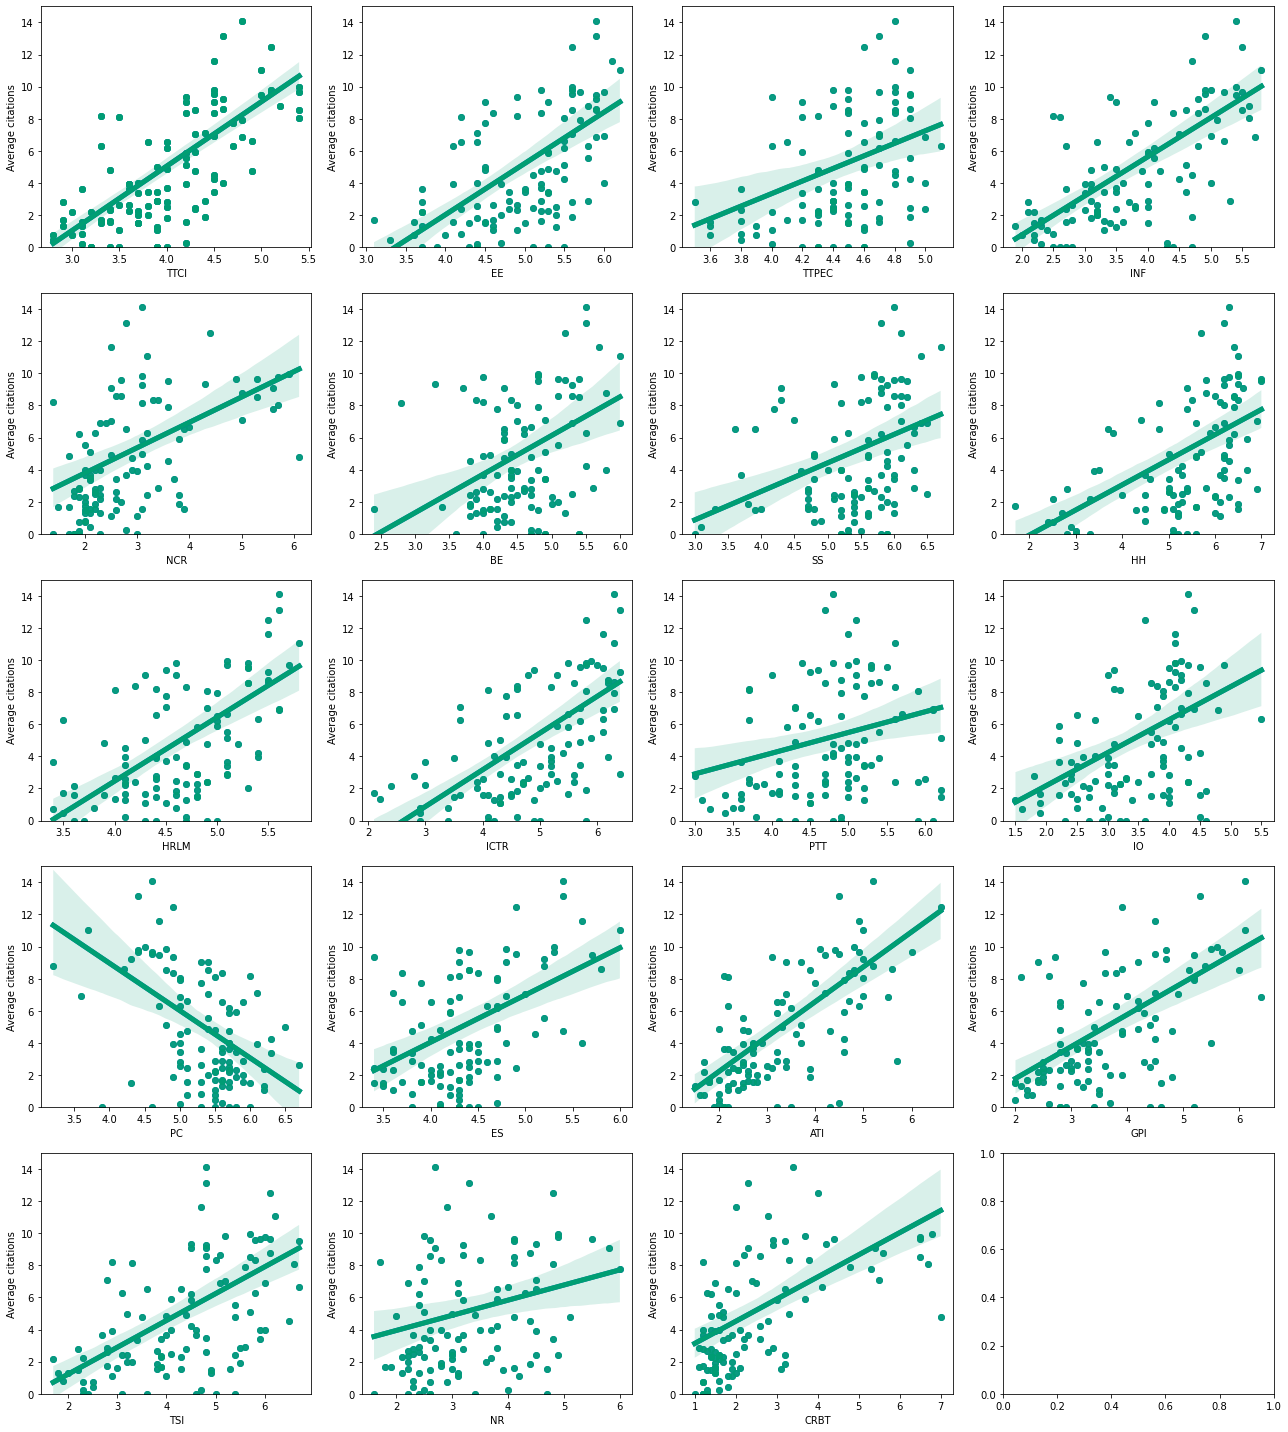

In [23]:
fig,ax = plt.subplots(5,4,figsize=(18,20))
i = j = 0
for index in cit_country_indexes.columns[2:]:
    sns.regplot(data=_[_['KIND']==str(index)],x='metric',y='AvgCit',order=1,ci=None,line_kws={'linewidth':5},label=str(index),ax=ax[i][j])
    sns.regplot(data=_[_['KIND']==str(index)],x='metric',y='AvgCit',order=1,line_kws={'linewidth':5},label=str(index),ax=ax[i][j])
    
    ax[i][j].set_xlabel(str(index))
    ax[i][j].set_ylabel('Average citations')
    ax[i][j].set_ylim(0,15)
    

    j+= 1
    if j == 4:
        j = 0
        i += 1

plt.tight_layout()
# plt.savefig('charts/cit_vs_metric_with_fit.png')

#### Commento  
Nella quasi totalità dei grafici di regressione lineare sopra riportati, notiamo un aumento delle citazioni medie all'aumentare del valore dell'indice che si trova sull'asse x.  
L'unica eccezione la fa l'indice PC, che descrive la competitività dei prezzi di uno Stato. Esso infatti segue un trend inverso rispetto a tutti gli altri indici

## Correlazione indici turistici relativi ad uno Stato

<AxesSubplot:title={'center':'Citazioni totali'}>

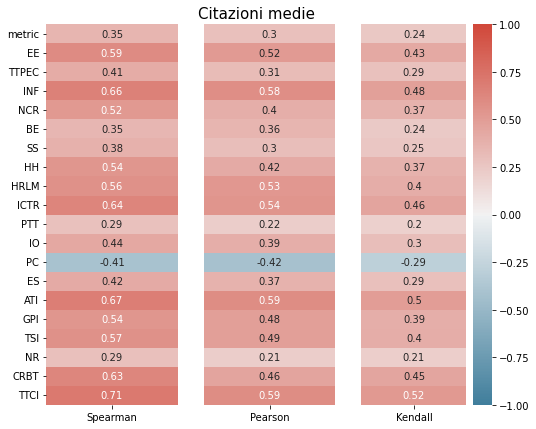

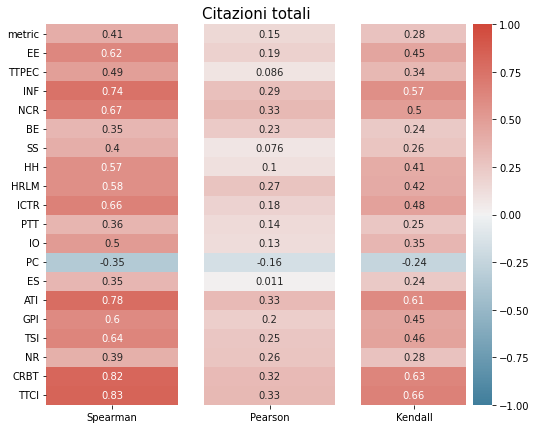

In [24]:
# _.drop(columns=['metric'],inplace=True)
corr_spearman = _.corr(method= 'spearman')
corr_kendall = _.corr(method= 'kendall')
corr_pearson = _.corr(method= 'pearson')

# CITAZIONI MEDIE
_s = corr_spearman.rename({'AvgCit':'Spearman'},axis=1)
_k = corr_kendall.rename({'AvgCit':'Kendall'},axis=1)
_p = corr_pearson.rename({'AvgCit':'Pearson'},axis=1)

_s.drop(['TotCit','AvgCit'], inplace=True)
_k.drop(['TotCit','AvgCit'], inplace=True)
_p.drop(['TotCit','AvgCit'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,7))
plt.title('Citazioni medie', fontsize = 15, x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
#plt.savefig('charts/corr_avg_cit_country.png')

# CITAZIONI TOTALI
_s = corr_spearman.rename({'TotCit':'Spearman'},axis=1)
_k = corr_kendall.rename({'TotCit':'Kendall'},axis=1)
_p = corr_pearson.rename({'TotCit':'Pearson'},axis=1)

_s.drop(['TotCit','AvgCit'], inplace=True)
_k.drop(['TotCit','AvgCit'], inplace=True)
_p.drop(['TotCit','AvgCit'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,7))
plt.title('Citazioni totali', fontsize = 15, x =-1)
sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
#plt.savefig('charts/corr_tot_cit_country.png')

#### Commenti  
Anche il calcolo della correlazione fa emergere il legame tra gli indici del World Economic Forum e le citazioni degli articoli. Stavolta non vengono analizzate solo le citazioni medie ma anche quelle totali.  
- Se nel grafico delle citazioni medie  non notiamo particolari differenze tra le tre tipologie diverse di correlazione, nelle citazioni totali si può notare la correlazione di Pearson che riporta valori molto più bassi rispetto alle altre due, in particolare rispetto a Spearman.  
- La similitudine più grande tra citazioni medie e totali è sicuramente la correlazione negativa dell'indice PC: si rimane quindi coerenti con l'analisi dei grafici di regressione lineare sopra riportati.    
- Se osserviamo i valori degli indici presenti nel paper e li confrontiamo con i nuovi valori, anche qui notiamo molte somiglianze. Sono soltanto due i parametri che si discostano :    
    1.TTCI nel paper, citazioni medie:  
    Spearman 0.5  
    Kendall 0.42  
    TTCI nei nuovi risultati, citazioni medie:  
    Spearman 0.71  
    Kendall 0.52

2. CRBT nel paper, citazioni medie:  
Spearman 0.34  
Pearson 0.3  
Kendall 0.23    
CRBT nei nuovi risultati, citazioni medie:  
Spearman 0.63  
Pearson 0.46  
Kendall 0.45

## Correlazione indici turistici relativi alle città

In [25]:
# creo un dataframe con le citazioni medie e totali per ogni città, ed i relativi indici turistici

df_MAG['City'] = df_MAG['ConferenceLocation'].str.split(',').str[0]
city_tot_cit = df_MAG.groupby(['City']).CitationCount.sum().sort_values(ascending=False)
city_tot_articles = df_MAG.groupby(['City']).CitationCount.count().sort_values(ascending=False)
city_avg_cit = {key:(int(val)/int(city_tot_articles[key])) for key,val in city_tot_cit.items()}
dict_cit_city_indexes = {k:[v,city_avg_cit[k]] for k,v in city_tot_cit.items()} 
df_city_avg_cit = pd.DataFrame(data=dict_cit_city_indexes.values(), index=dict_cit_city_indexes.keys(), columns=['TotCit', 'AvgCit'])

touristic_indexes_cities = pd.read_csv('all_indexes_by_city.csv')
cit_city_indexes = df_city_avg_cit.join(touristic_indexes_cities.set_index('city'))
# i risultati di google erano salvati come stringa, quindi non riuscivo a fare il calcolo della correlazione. Converto in intero
cit_city_indexes['google'] = cit_city_indexes['google'].str.replace('.','')
cit_city_indexes['google'] = pd.to_numeric(cit_city_indexes['google'])
cit_city_indexes

/tmp/ipykernel_13676/2793944192.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cit_city_indexes['google'] = cit_city_indexes['google'].str.replace('.','')


,TotCit,AvgCit,google,booking,tripadvisor
San Diego,852114,14.326541,868000000,980.000,1.704
San Francisco,754515,16.206263,1160000000,287.000,2.327
Seattle,574045,18.349476,841000000,272.000,1.342
Boston,549681,20.048180,1170000000,243.000,1.124
Washington,540408,13.603041,1990000000,276.000,1.265
...,...,...,...,...,...
Steinfeld,0,0.000000,33900000,NaN,1.000
Maharashtra,0,0.000000,1570000000,4.759,3.874
Espírito Santo,0,0.000000,176000000,200.000,688.000
Essaouira,0,0.000000,8820000,367.000,335.000


<AxesSubplot:title={'center':'Citazioni totali'}>

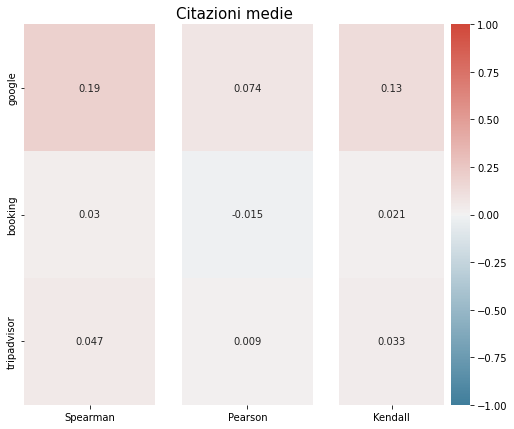

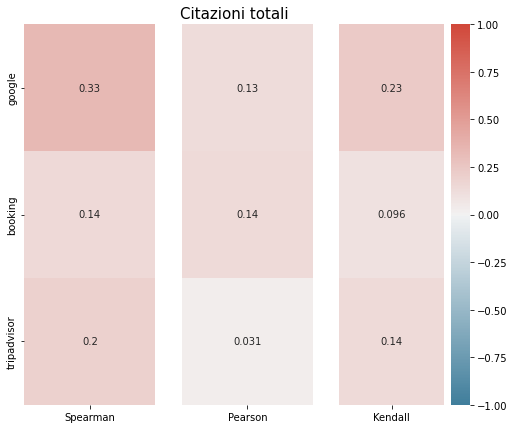

In [26]:
corr_spearman = cit_city_indexes.corr(method= 'spearman')
corr_kendall = cit_city_indexes.corr(method= 'kendall')
corr_pearson = cit_city_indexes.corr(method= 'pearson')

_s = corr_spearman.rename({'AvgCit':'Spearman'},axis=1)
_k = corr_kendall.rename({'AvgCit':'Kendall'},axis=1)
_p = corr_pearson.rename({'AvgCit':'Pearson'},axis=1)

_s.drop(['TotCit','AvgCit'], inplace=True)
_k.drop(['TotCit','AvgCit'], inplace=True)
_p.drop(['TotCit','AvgCit'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,7))
plt.title('Citazioni medie', fontsize = 15, x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
# plt.savefig('charts/corr_avg_cit_city.png')

_s = corr_spearman.rename({'TotCit':'Spearman'},axis=1)
_k = corr_kendall.rename({'TotCit':'Kendall'},axis=1)
_p = corr_pearson.rename({'TotCit':'Pearson'},axis=1)

_s.drop(['TotCit','AvgCit'], inplace=True)
_k.drop(['TotCit','AvgCit'], inplace=True)
_p.drop(['TotCit','AvgCit'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,7))
plt.title('Citazioni totali', fontsize = 15, x =-1)
sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
# plt.savefig('charts/corr_tot_cit_city.png')

#### Commenti  
- I risultati di quest'ultima analisi non sono molto incoraggianti: per quanto riguarda le citazioni medie, quasi tutti i valori sono vicini allo 0; ne abbiamo persino uno negativo, anche se comunque vicinissimo allo 0 (-0.0015).  
-Un leggero miglioramento possiamo osservarlo nello schema delle citazioni totali:
nello specifico i valori della correlazione con i risultati Google sono quelli che dimostrano un maggior nesso tra questo indice e le citazioni.
-Anche qui la correlazione di Pearson è la più "debole" tra tutte (così come nelle citazioni medie).